## 【課題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [116]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
df = data[['GrLivArea', 'YearBuilt', 'SalePrice']]

## 【課題2】線形回帰による推定と評価
データを簡単に分析、前処理し、線形回帰による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


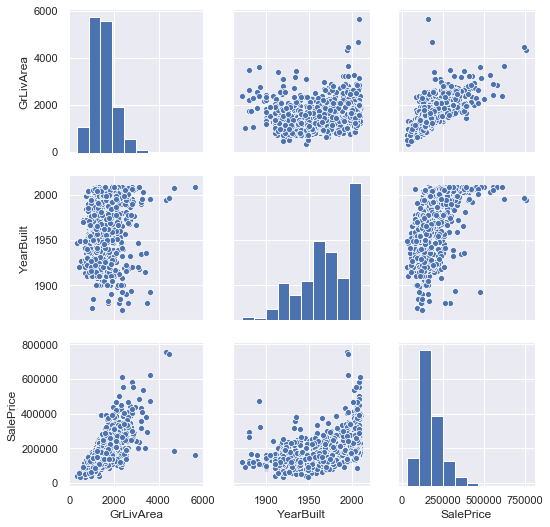

In [59]:
sns.pairplot(df[['GrLivArea', 'YearBuilt', 'SalePrice']]);

In [60]:
#それぞれの特徴量を対数変換
df.loc[:,'GrLivArea_Log'] = np.log(df['GrLivArea'])
df.loc[:,'YearBuilt_Log'] = np.log(df['YearBuilt'])
df.loc[:,'SalePrice_Log'] = np.log(df['SalePrice'])
df

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,GrLivArea,YearBuilt,SalePrice,GrLivArea_Log,YearBuilt_Log,SalePrice_Log
0,1710,2003,208500,7.444249,7.602401,12.247694
1,1262,1976,181500,7.140453,7.588830,12.109011
2,1786,2001,223500,7.487734,7.601402,12.317167
3,1717,1915,140000,7.448334,7.557473,11.849398
4,2198,2000,250000,7.695303,7.600902,12.429216
...,...,...,...,...,...,...
1455,1647,1999,175000,7.406711,7.600402,12.072541
1456,2073,1978,210000,7.636752,7.589842,12.254863
1457,2340,1941,266500,7.757906,7.570959,12.493130
1458,1078,1950,142125,6.982863,7.575585,11.864462


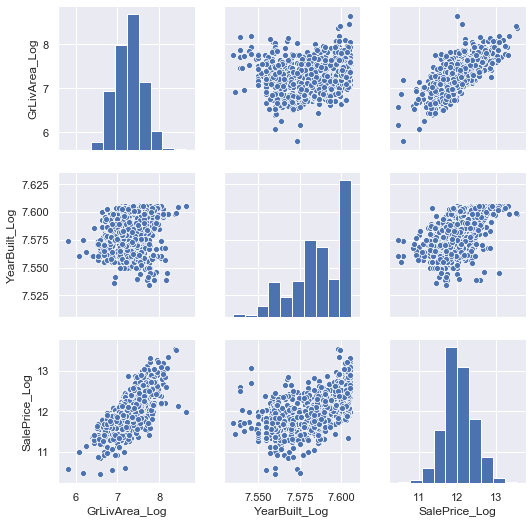

In [61]:
sns.pairplot(df[['GrLivArea_Log', 'YearBuilt_Log', 'SalePrice_Log']]);

In [62]:
#GrLivArea_LogとYearBuilt_Logを抽出
X = df[['GrLivArea_Log', 'YearBuilt_Log']].values
y = df['SalePrice_Log'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [64]:
#stardardscalerで標準化
scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test);

In [65]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print('MSE: {:.6f}'.format(mean_squared_error(y_test, y_pred)))

MSE: 0.038349


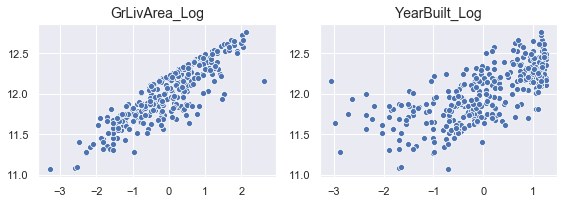

In [66]:
#可視化
#2次元プロット
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
sns.scatterplot(X_test[:, 0], y_pred, ax=ax0)
ax0.set_title('GrLivArea_Log', fontsize=14)
sns.scatterplot(X_test[:, 1], y_pred, ax=ax1)
ax1.set_title('YearBuilt_Log', fontsize=14)
plt.tight_layout()
plt.show();

In [67]:
#3次元プロット
a = np.linspace(np.min(X_test[:,0])-0.5, np.max(X_test[:,0])+0.5, num=10)
b = np.linspace(np.min(X_test[:,1])-0.5, np.max(X_test[:,1])+0.5, num=10)
a, b = np.meshgrid(a, b)
c = a * linear.coef_[0] + b * linear.coef_[1] + linear.intercept_

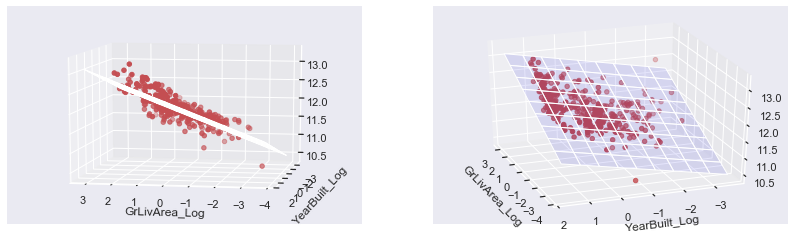

In [68]:
# %matplotlib notebook
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(a, b, c, color='blue', alpha=0.1)
ax.scatter(X_test[:,0], X_test[:,1], y_test, c='r')
ax.set_xlabel('GrLivArea_Log')
ax.set_ylabel('YearBuilt_Log')
ax.view_init(elev=10, azim=100);

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(a, b, c, color='blue', alpha=0.1)
ax1.scatter(X_test[:,0], X_test[:,1], y_test, c='r')
ax1.set_xlabel('GrLivArea_Log')
ax1.set_ylabel('YearBuilt_Log')
ax1.view_init(elev=30, azim=160);

## 【課題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。  
そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。  
どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。
- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
result = pd.DataFrame(np.zeros((4, 1)), 
                      index=['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest'],
                      columns=['MSE'])

### Linear Regression
**パラメータ**  
fit_intercept: 切片を考慮するか (bool, optional, default=True)   
normalize: 標準化するか (bool, optional, default=False)  

In [71]:
from sklearn.linear_model import LinearRegression

parameters = {'fit_intercept': [True, False]}
linear = LinearRegression()
regr = GridSearchCV(linear, parameters, cv=5, verbose=1, scoring='neg_mean_squared_error')
regr.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [72]:
linear_best = regr.best_estimator_
linear_best

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
regr.cv_results_

{'mean_fit_time': array([0.00240273, 0.00705252]),
 'std_fit_time': array([0.00154948, 0.0070036 ]),
 'mean_score_time': array([0.00064411, 0.00050225]),
 'std_score_time': array([1.69443707e-04, 6.57687233e-05]),
 'param_fit_intercept': masked_array(data=[True, False],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True}, {'fit_intercept': False}],
 'split0_test_score': array([-4.63586644e-02, -1.45816926e+02]),
 'split1_test_score': array([-6.11256234e-02, -1.45176024e+02]),
 'split2_test_score': array([-4.01180486e-02, -1.46505040e+02]),
 'split3_test_score': array([-4.44785611e-02, -1.45730000e+02]),
 'split4_test_score': array([-4.88011781e-02, -1.44524678e+02]),
 'mean_test_score': array([-4.81764151e-02, -1.45550534e+02]),
 'std_test_score': array([0.0070709, 0.6643632]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [74]:
y_pred = regr.predict(X_test)
result.loc['Linear Regression'] = mean_squared_error(y_test, y_pred)
result.loc['Linear Regression']

MSE    0.038349
Name: Linear Regression, dtype: float64

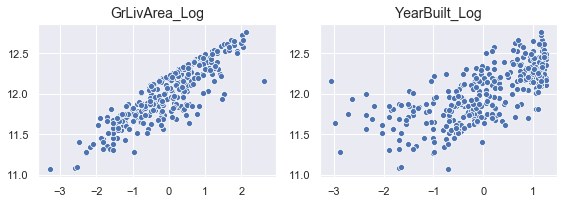

In [75]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
sns.scatterplot(X_test[:, 0], y_pred, ax=ax0)
ax0.set_title('GrLivArea_Log', fontsize=14)
sns.scatterplot(X_test[:, 1], y_pred, ax=ax1)
ax1.set_title('YearBuilt_Log', fontsize=14)
plt.tight_layout()
plt.show();

### SVM
**パラメータ**  
kernel: カーネル関数 (string, optional, default='rbf')   
gamma: カーネル係数 (\['scale', 'auto'\] or float, optional, default='scale')  
C: 正規化パラメータ (float, optional, default=1.0)  
epsilon: (float, optional, default=0.1)

In [76]:
from sklearn.svm import SVR

In [77]:
parameters = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'C': [0.01, 0.1, 1, 10],
              'epsilon': [0, 0.01, 0.1, 1, 10]
             }
svr = SVR()
regr = GridSearchCV(svr, parameters, cv=5, verbose=1, scoring='neg_mean_squared_error')
regr.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:   48.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'epsilon': [0, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [78]:
svr_best = regr.best_estimator_
svr_best

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [79]:
#regr.cv_results_

In [80]:
y_pred = regr.predict(X_test)
result.loc['SVM'] = mean_squared_error(y_test, y_pred)
result.loc['SVM']

MSE    0.035299
Name: SVM, dtype: float64

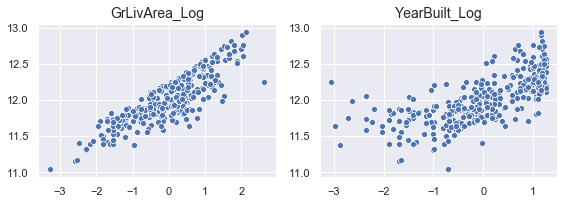

In [81]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
sns.scatterplot(X_test[:, 0], y_pred, ax=ax0)
ax0.set_title('GrLivArea_Log', fontsize=14)
sns.scatterplot(X_test[:, 1], y_pred, ax=ax1)
ax1.set_title('YearBuilt_Log', fontsize=14)
plt.tight_layout()
plt.show();

### Decision Tree
**パラメータ**  
criterion: splitに用いる指標 ({'mse', 'friedman_mse', 'mae'}, default='mse')  
splitter: splitのstrategy ({'best', 'random'}, default='best')  
max_depth: 木の最大深さ (int, default=None)  
min_samples_split: nodeでの分割に必要な最低サンプル数 (int or float, default=2)  
min_samples_leaf: 葉に必要な最低サンプル数 (int or float, default=1)  
max_features: splitに使用する特徴量の最大数 (int, float or \{'auto', 'sqrt', 'log2'\}, default=None)  
max_leaf_node: 葉の最大数 (int, default=None)  

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
parameters = {'criterion': ['mse', 'friedman_mse', 'mae'],
              'splitter': ['best', 'random'],
              'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 8],
              'min_samples_leaf': [1, 3, 5]
         }
tree = DecisionTreeRegressor()
regr = GridSearchCV(tree, parameters, cv=5, verbose=1, scoring='neg_mean_squared_error')
regr.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    4.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 8],
    

In [84]:
tree_best = regr.best_estimator_
print(tree_best)

y_pred = regr.predict(X_test)
result.loc['Decision Tree'] = mean_squared_error(y_test, y_pred)
result.loc['Decision Tree']

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


MSE    0.040947
Name: Decision Tree, dtype: float64

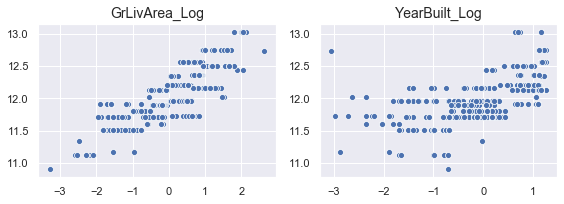

In [85]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
sns.scatterplot(X_test[:, 0], y_pred, ax=ax0)
ax0.set_title('GrLivArea_Log', fontsize=14)
sns.scatterplot(X_test[:, 1], y_pred, ax=ax1)
ax1.set_title('YearBuilt_Log', fontsize=14)
plt.tight_layout()
plt.show();

### RamdomForest Classifier
**パラメータ**  
n_estimators: 木の数 (int, default=100)  
criterion: splitに用いる指標 ({'mse', 'friedman_mse', 'mae'}, default='mse')  
bootstap: ブートストラップ法でサンプリングを行うかどうか (bool, optional, default=True)  
oob_score: oobによる汎化誤差の推定 (bool, default=False)  
max_depth: 木の最大深さ (int, default=None)  
min_samples_split: nodeでの分割に必要な最低サンプル数 (int or float, default=2)  
min_samples_leaf: 葉に必要な最低サンプル数 (int or float, default=1)  
max_features: splitに使用する特徴量の最大数 (int, float or \{'auto', 'sqrt', 'log2'\}, default=None)  
max_leaf_node: 葉の最大数 (int, default=None)

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
parameters = {'n_estimators': [10, 50, 100],
              'criterion': ['mse', 'friedman_mse', 'mae'],
              'bootstrap': [True, False],
              'oob_score': [False],
              'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 8],
              'min_samples_leaf': [1, 3, 5]
         }
forest = RandomForestRegressor()
regr = GridSearchCV(forest, parameters, cv=5, verbose=1, scoring='neg_mean_squared_error')
regr.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed: 11.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
   

In [88]:
forest_best = regr.best_estimator_
print(forest_best)

y_pred = regr.predict(X_test)
result.loc['Random Forest'] = mean_squared_error(y_test, y_pred)
result.loc['Random Forest']

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


MSE    0.037362
Name: Random Forest, dtype: float64

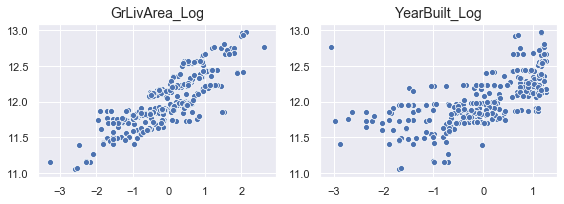

In [89]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
sns.scatterplot(X_test[:, 0], y_pred, ax=ax0)
ax0.set_title('GrLivArea_Log', fontsize=14)
sns.scatterplot(X_test[:, 1], y_pred, ax=ax1)
ax1.set_title('YearBuilt_Log', fontsize=14)
plt.tight_layout()
plt.show();

In [90]:
result

,MSE
Linear Regression,0.038349
SVM,0.035299
Decision Tree,0.040947
Random Forest,0.037362
